In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import MisrToolkit as mtk # needs python3.6
# from mpl_toolkits.basemap import Basemap # needs python 3.8?
import sys # to check python version
import os
import glob
import datetime as dt

In [18]:
# roughness_dir = '/Volumes/SEAGATE/july_2016/roughness_1_to_16_july2016_subdirs'
roughness_dir = '/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH'

In [19]:
os.path.isdir(roughness_dir)

True

In [20]:
# path to training dataset

# trainingDS_dir = "/Users/ehsanmos/Documents/RnD/MISR_lab/ML_research/training_dataset"
trainingDS_dir = "/Volumes/SEAGATE/april_2016/"
# trainingDS_dir = "/Volumes/SEAGATE/july_2016/"


trainingDS_csv = "outSample_lon226_230_atmmodel_april_2016.csv"
# trainingDS_csv = "outSample_lon201_202_atmmodel_july_2016_1to16.csv"
old_trainig_ds = 'off'


# # old method
# trainingDS_csv = "atmmodel_april_2016.csv"
# old_trainig_ds = 'on'


In [21]:
old_trainig_ds

'off'

In [22]:
# open/read input dataset

atm_trainigDS_fp = os.path.join(trainingDS_dir, trainingDS_csv)
os.path.isfile(atm_trainigDS_fp)

True

In [23]:
atm_transect = pd.read_csv(atm_trainigDS_fp)

In [24]:
atm_transect.shape

(3722, 15)

In [25]:
# info of path-orbit-block and then select absed on this info

atm_transect['path'].value_counts()

144    1225
71     1174
64     1113
151     210
Name: path, dtype: int64

In [26]:
atm_transect['orbit'].value_counts()

87038    1225
87048    1174
87033    1113
87053     210
Name: orbit, dtype: int64

In [27]:
atm_transect['block'].value_counts()

30    812
9     784
29    700
31    471
8     441
28    276
7     183
32     28
6      27
Name: block, dtype: int64

In [28]:
# select POB to extract
# note: we selected an arbiterary POB as following 
# Arbitrary POB
selected_path = 64
selected_orbit = 87033
selected_block = 30


In [29]:
if (old_trainig_ds == 'on'):
    # rename columns
    atm_transect.rename(columns={'#path':'path', ' orbit':'orbit', ' img_block':'block',\
                                 ' line':'line', ' sample':'sample',\
                                ' rms':'mean_ATM_roughness'}, inplace=True)
    

In [30]:
atm_transect.columns

Index(['path', 'orbit', 'block', 'line', 'sample', 'lat', 'lon', ' an', ' ca',
       ' cf', 'mean_ATM_roughness', ' weight', 'npts', ' cloud', ' var'],
      dtype='object')

In [31]:
# remove zeros

filter_zeros_cond = (atm_transect['path']==0) & (atm_transect['orbit']==0) & (atm_transect['block']==0)

zero_index_list = atm_transect.index[filter_zeros_cond].tolist()
print(len(zero_index_list))

atm_transect.drop(labels=zero_index_list, axis=0, inplace=True)
atm_transect.head()

0


,path,orbit,block,line,sample,lat,lon,an,ca,cf,mean_ATM_roughness,weight,npts,cloud,var
0,64,87033,30,315,395,74.578902,228.706784,0.796723,0.896455,0.903093,6.390000,0.5,0.5,-1,0.000000
1,64,87033,30,314,395,74.579198,228.707117,0.793323,0.891274,0.905035,6.258889,0.5,4.5,-1,0.319911
2,64,87033,30,313,395,74.581857,228.710105,0.783932,0.887064,0.886255,6.913750,0.5,4.0,-1,0.307690
3,64,87033,30,312,395,74.584221,228.712758,0.719981,0.895321,0.842865,7.030000,0.5,4.0,-1,0.523713
4,64,87033,30,311,395,74.586586,228.715409,0.718686,0.903416,0.807570,7.442500,0.5,4.0,-1,0.602054


In [32]:
# maybe if we want to select a smaller subset of transect, like the first 1000 points (or 10)

# max_step = 1119
# max_step = 20462
# max_step = 1000
max_step = atm_transect.shape[0]

atm_transect_small = atm_transect.iloc[0:max_step]

In [33]:
atm_transect_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3722 entries, 0 to 3721
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   path                3722 non-null   int64  
 1   orbit               3722 non-null   int64  
 2   block               3722 non-null   int64  
 3   line                3722 non-null   int64  
 4   sample              3722 non-null   int64  
 5   lat                 3722 non-null   float64
 6   lon                 3722 non-null   float64
 7    an                 3722 non-null   float64
 8    ca                 3722 non-null   float64
 9    cf                 3722 non-null   float64
 10  mean_ATM_roughness  3722 non-null   float64
 11   weight             3722 non-null   float64
 12  npts                3722 non-null   float64
 13   cloud              3722 non-null   int64  
 14   var                3722 non-null   float64
dtypes: float64(9), int64(6)
memory usage: 465.2 KB


In [34]:
# # delete the first column

# atm_transect_small.drop(labels='Unnamed: 0', axis=1, inplace=True)
# atm_transect_small.columns

In [35]:
atm_transect_small = atm_transect_small.astype({'path':int, 'orbit':int, 'block':int, 'line':int, 'sample':int})
atm_transect_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3722 entries, 0 to 3721
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   path                3722 non-null   int64  
 1   orbit               3722 non-null   int64  
 2   block               3722 non-null   int64  
 3   line                3722 non-null   int64  
 4   sample              3722 non-null   int64  
 5   lat                 3722 non-null   float64
 6   lon                 3722 non-null   float64
 7    an                 3722 non-null   float64
 8    ca                 3722 non-null   float64
 9    cf                 3722 non-null   float64
 10  mean_ATM_roughness  3722 non-null   float64
 11   weight             3722 non-null   float64
 12  npts                3722 non-null   float64
 13   cloud              3722 non-null   int64  
 14   var                3722 non-null   float64
dtypes: float64(9), int64(6)
memory usage: 465.2 KB


In [36]:
atm_transect_small.head()

,path,orbit,block,line,sample,lat,lon,an,ca,cf,mean_ATM_roughness,weight,npts,cloud,var
0,64,87033,30,315,395,74.578902,228.706784,0.796723,0.896455,0.903093,6.390000,0.5,0.5,-1,0.000000
1,64,87033,30,314,395,74.579198,228.707117,0.793323,0.891274,0.905035,6.258889,0.5,4.5,-1,0.319911
2,64,87033,30,313,395,74.581857,228.710105,0.783932,0.887064,0.886255,6.913750,0.5,4.0,-1,0.307690
3,64,87033,30,312,395,74.584221,228.712758,0.719981,0.895321,0.842865,7.030000,0.5,4.0,-1,0.523713
4,64,87033,30,311,395,74.586586,228.715409,0.718686,0.903416,0.807570,7.442500,0.5,4.0,-1,0.602054


In [37]:
# set filters to select a MISR block

path_filter = (atm_transect_small['path']==selected_path)
orbit_filter = (atm_transect_small['orbit']==selected_orbit)
block_filter = (atm_transect_small['block']==selected_block)

atm_transect_small_filtered = atm_transect_small.loc[path_filter & orbit_filter & block_filter]
atm_transect_small_filtered.shape

(576, 15)

In [50]:
# sort by column ("line")

atm_transect_small_filtered.sort_values(by='line', axis=0, inplace=True) # axis=0 == column names
atm_transect_small_filtered.head(100)


/Applications/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,path,orbit,block,line,sample,lat,lon,an,ca,cf,mean_ATM_roughness,weight,npts,cloud,var,MISR-roughness
895,64,87033,30,0,342,75.331627,229.563508,0.815991,0.939521,0.918878,12.727500,0.5,4.0,-1,1.817180,21.600016
894,64,87033,30,1,342,75.329264,229.560734,0.818303,0.931264,0.925484,21.415000,0.5,4.0,-1,6.085062,21.320311
893,64,87033,30,2,342,75.327787,229.559001,0.817808,0.929778,0.928291,32.212000,0.5,2.5,-1,14.319795,20.769322
892,64,87033,30,2,343,75.326606,229.557615,0.816487,0.930934,0.928456,13.022500,0.5,2.0,-1,1.204728,21.008445
891,64,87033,30,3,343,75.324244,229.554843,0.815826,0.927135,0.929943,18.643750,0.5,4.0,-1,6.651723,20.762725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,64,87033,30,82,356,75.135069,229.333466,0.771839,0.897273,0.881326,5.137778,0.5,4.5,-1,0.240406,15.971170
799,64,87033,30,83,356,75.132737,229.330649,0.766907,0.893327,0.884121,5.002500,0.5,4.0,-1,0.197215,15.845717
797,64,87033,30,84,357,75.130405,229.327833,0.766578,0.892176,0.890697,5.560000,0.5,3.5,-1,0.397420,16.312499
798,64,87033,30,84,356,75.132445,229.330296,0.769537,0.893163,0.889546,4.850000,0.5,0.5,-1,0.000000,16.437313


In [39]:
# check for duplicates in rows of dataset




## find roughess.dat files

In [40]:
misr_roughness_in_pixel_list = []


# for irow in range(atm_transect_small.shape[0]):
for irow in range(atm_transect_small_filtered.shape[0]):


#     path = atm_transect_small['#path'].iloc[irow]
#     orbit = atm_transect_small[' orbit'].iloc[irow]
#     block = atm_transect_small[' img_block'].iloc[irow]
#     line = atm_transect_small[' line'].iloc[irow]
#     sample = atm_transect_small[' sample'].iloc[irow]
    
    
    path = atm_transect_small_filtered['path'].iloc[irow]
    orbit = atm_transect_small_filtered['orbit'].iloc[irow]
    block = atm_transect_small_filtered['block'].iloc[irow]
    line = atm_transect_small_filtered['line'].iloc[irow]
    sample = atm_transect_small_filtered['sample'].iloc[irow]


    # zfill() path and string it
    if path < 100:
        path_str = str(path).zfill(3)
    else:
        path_str = str(path)


    # zfill() block and string it
    if block < 10:
        block_str = str(block).zfill(2)
    else:
        block_str = str(block)


    # pattern of roughness.dat file
    roughness_file_pattern = "roughness_toa_refl_P"+path_str+"_O0"+str(orbit)+"_B0"+block_str+".dat"
    print('looking for pattern: %s' %roughness_file_pattern)

    # find roughness file
    rough_file_list = glob.glob(os.path.join(roughness_dir, roughness_file_pattern))

    if (len(rough_file_list) < 1):
        raise ValueError("roughness list came out empty!")

    if (len(rough_file_list) > 1):
        raise ValueError("roughness list has more that 1 file! there should be an error in our logic!")


    # open it and change binary to array
    rough_2d_arr = np.fromfile(rough_file_list[0], dtype=np.double)[0:1048576].reshape((512,-1))
#     print(rough_2d_arr.shape)
    misr_roughness = rough_2d_arr[int(line), int(sample)]
    # append predixted value to our list
    misr_roughness_in_pixel_list.append(misr_roughness)

    

#     if misr_roughness > 1:
#         misr_roughness_in_pixel_list.append(misr_roughness)
#     else:
#         print('MISR roughness in pixel: %s' %misr_roughness)
#         raise ValueError("why MISR roughness is negative for an ATM location? model error? or something else?")

        
print("\ntotal MISR roughness files: %s" %len(misr_roughness_in_pixel_list))


looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking 

looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking 

looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking 

looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking for pattern: roughness_toa_refl_P064_O087033_B030.dat
looking 

In [41]:
atm_transect_small_filtered.columns

Index(['path', 'orbit', 'block', 'line', 'sample', 'lat', 'lon', ' an', ' ca',
       ' cf', 'mean_ATM_roughness', ' weight', 'npts', ' cloud', ' var'],
      dtype='object')

In [42]:
# build a DF from both ATM and MISR lists

atm_transect_small_filtered['MISR-roughness'] = misr_roughness_in_pixel_list
atm_transect_small_filtered.columns

/var/folders/0l/r3vc28ks6n99yn157sn20whw0000gn/T/ipykernel_9564/4230507440.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atm_transect_small_filtered['MISR-roughness'] = misr_roughness_in_pixel_list


Index(['path', 'orbit', 'block', 'line', 'sample', 'lat', 'lon', ' an', ' ca',
       ' cf', 'mean_ATM_roughness', ' weight', 'npts', ' cloud', ' var',
       'MISR-roughness'],
      dtype='object')

In [43]:
# remove negative values from DF

negative_misr_index_list = atm_transect_small_filtered.loc[atm_transect_small_filtered['MISR-roughness']<0].index
print(len(atm_transect_small_filtered))
atm_transect_small_filtered.drop(negative_misr_index_list, axis='index', inplace=True)

576


/Applications/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [44]:
row_count = atm_transect_small_filtered.shape[0]

## plot transect

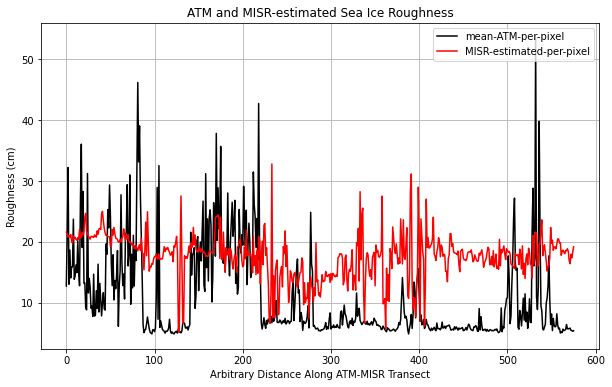

In [45]:
# x = range(len(misr_roughness_in_pixel_list))
x= range(row_count)

fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(x, atm_transect_small_filtered['mean_ATM_roughness'], color='black', label='mean-ATM-per-pixel')
ax.plot(x, atm_transect_small_filtered['MISR-roughness'], color='red', label='MISR-estimated-per-pixel')

# Same as above
ax.set_xlabel('Arbitrary Distance Along ATM-MISR Transect')
ax.set_ylabel('Roughness (cm)')
ax.set_title('ATM and MISR-estimated Sea Ice Roughness')
ax.grid(True)
ax.legend(loc='upper right');

## plot histogram

Text(0.5, 1.0, 'Histogram')

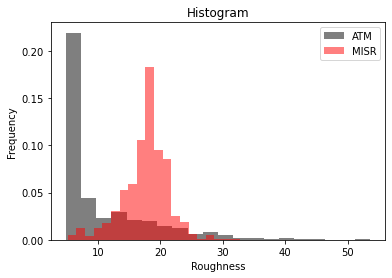

In [46]:
plt.hist(atm_transect_small_filtered['mean_ATM_roughness'], density=True, bins=20, label='ATM', color='black', alpha=0.5)  # density=False would make counts
plt.hist(atm_transect_small_filtered['MISR-roughness'], density=True, bins=20, label='MISR', color='red', alpha=0.5)  # density=False would make counts

plt.xlabel('Roughness')
plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.title("Histogram")


## statistics

In [47]:
# describe the statistics

atm_transect_small_filtered['mean_ATM_roughness'].describe()

count    576.000000
mean      10.826331
std        7.479107
min        4.850000
25%        5.813750
50%        6.965803
75%       13.998750
max       53.600000
Name: mean_ATM_roughness, dtype: float64

In [48]:
# change list to DF

# misr_roughness_in_pixel_df = pd.DataFrame(misr_roughness_in_pixel_list, columns=['rms'])

In [49]:
atm_transect_small_filtered['MISR-roughness'].describe()

count    576.000000
mean      17.667742
std        3.677389
min        5.165000
25%       15.969617
50%       18.011989
75%       19.677852
max       32.796794
Name: MISR-roughness, dtype: float64